<a href="https://colab.research.google.com/github/EstherMamai/Maternalhealthrisk/blob/main/maternalhealthrisk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading the data

In [ ]:
df=pd.read_csv("/content/Maternal Health Risk Data Set.csv")

In [ ]:
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [ ]:
df.tail()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk
1013,32,120,65,6.0,101.0,76,mid risk


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [ ]:
df.shape[0]

1014

In [ ]:
df.shape[1]

7

In [ ]:
df.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


# Data Preprocessing

## Missing Values

In [ ]:
df.isnull().sum()

,0
Age,0
SystolicBP,0
DiastolicBP,0
BS,0
BodyTemp,0
HeartRate,0
RiskLevel,0


*There are no missing values in the dataset*

# Exploratory Data Analysis

In [ ]:
df.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [ ]:
cat_cols=df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=['float64','int64'])
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['RiskLevel'], dtype='object')
Numerical Variables:
      Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate
0      25         130           80  15.0      98.0         86
1      35         140           90  13.0      98.0         70
2      29          90           70   8.0     100.0         80
3      30         140           85   7.0      98.0         70
4      35         120           60   6.1      98.0         76
...   ...         ...          ...   ...       ...        ...
1009   22         120           60  15.0      98.0         80
1010   55         120           90  18.0      98.0         60
1011   35          85           60  19.0      98.0         86
1012   43         120           90  18.0      98.0         70
1013   32         120           65   6.0     101.0         76

[1014 rows x 6 columns]


Age
Skew : 0.78


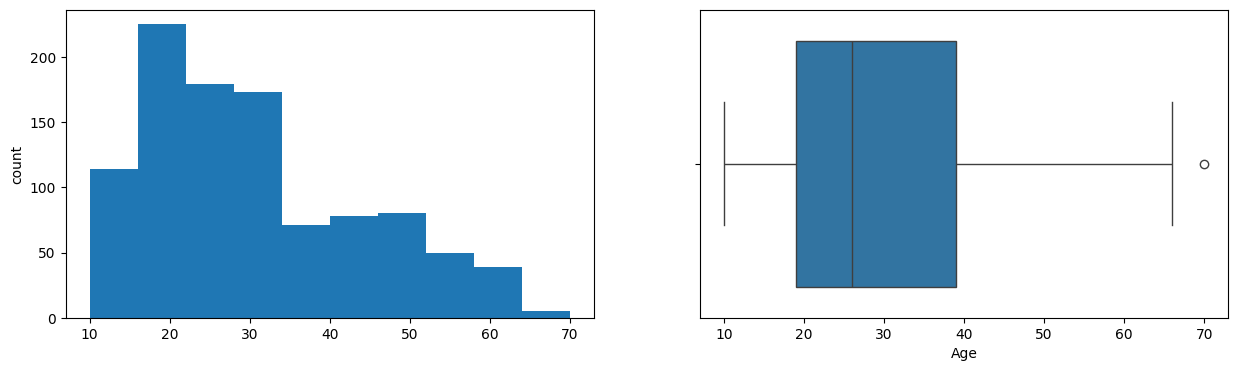

SystolicBP
Skew : -0.25


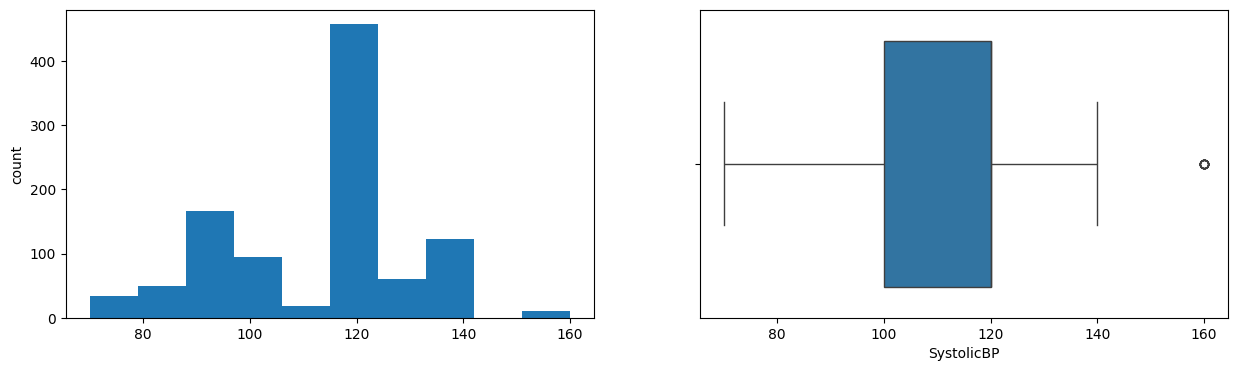

DiastolicBP
Skew : -0.05


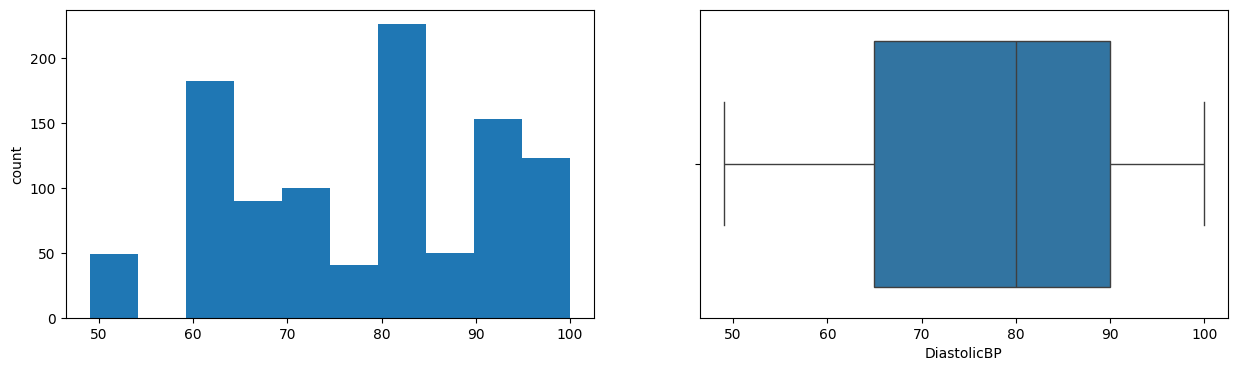

BS
Skew : 1.87


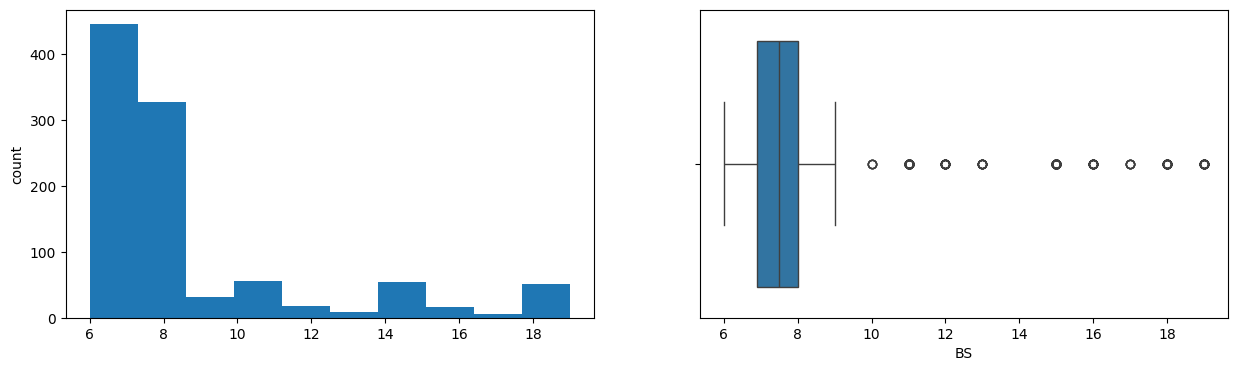

BodyTemp
Skew : 1.75


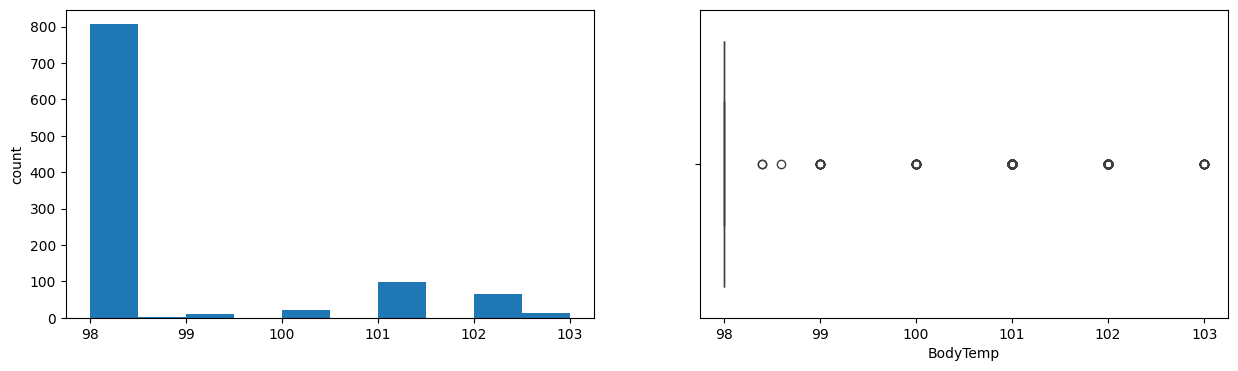

HeartRate
Skew : -1.04


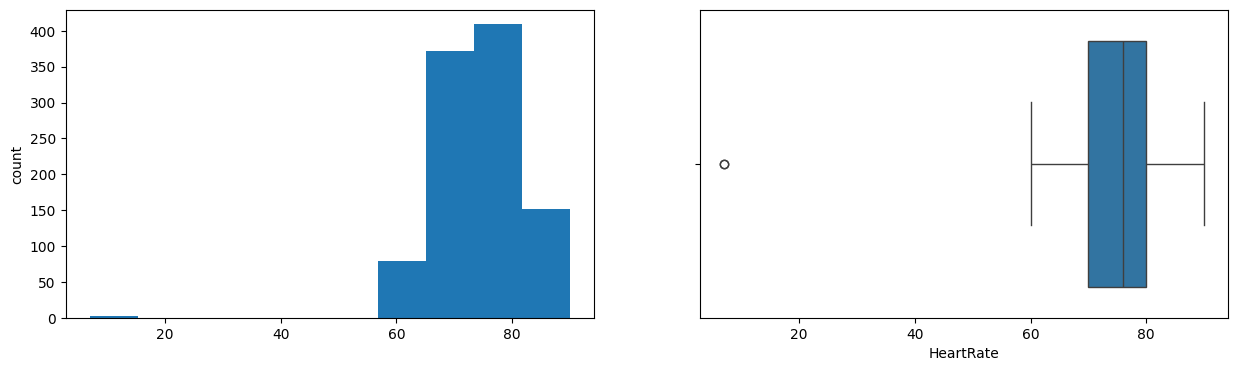

In [ ]:
for col in num_cols:
    print(col)
    print('Skew :', round(df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.show()

In [ ]:
data=df.copy()

In [ ]:
data['BS_log'] = np.log(data['BS'] + 1)  # Adding 1 to handle any zero values
data['BodyTemp_log'] = np.log(data['BodyTemp'] + 1)
data['HeartRate_squared'] = np.square(data['HeartRate'])

In [ ]:
from scipy.stats import boxcox

data['BS_boxcox'], _ = boxcox(data['BS'] + 1)  # Adding 1 to handle any zero values

In [ ]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')
data['BS_yeojohnson'] = pt.fit_transform(data[['BS']])
data['BodyTemp_yeojohnson'] = pt.fit_transform(data[['BodyTemp']])

In [ ]:
cat_cols=data.select_dtypes(include=['object']).columns
num_cols = data.select_dtypes(include=['float64','int64'])

Age
Skew : 0.78


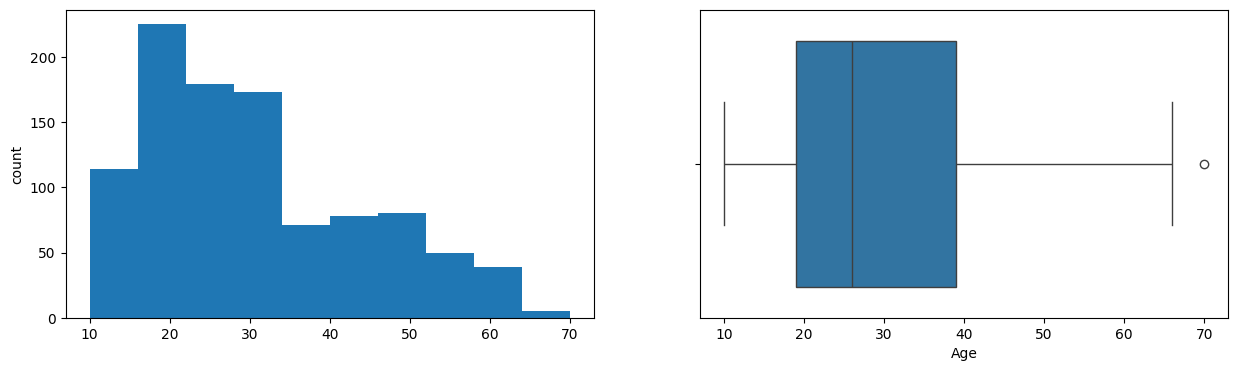

SystolicBP
Skew : -0.25


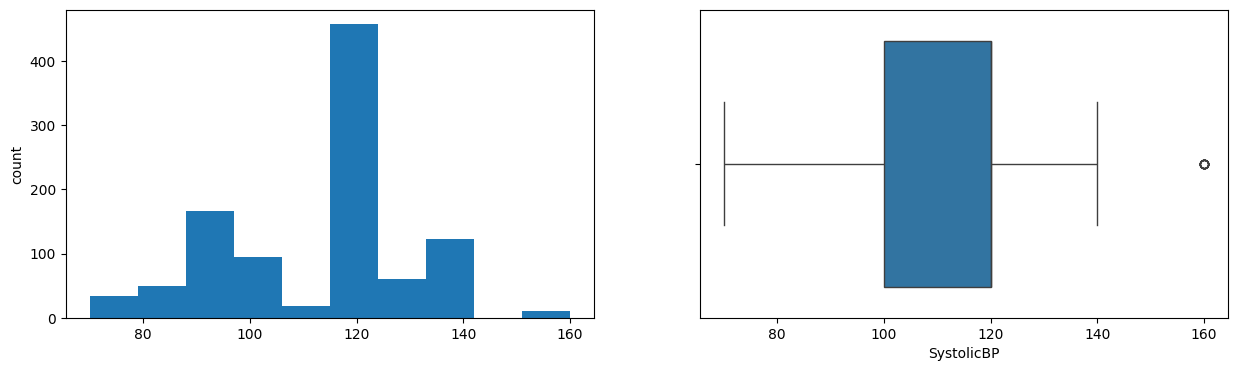

DiastolicBP
Skew : -0.05


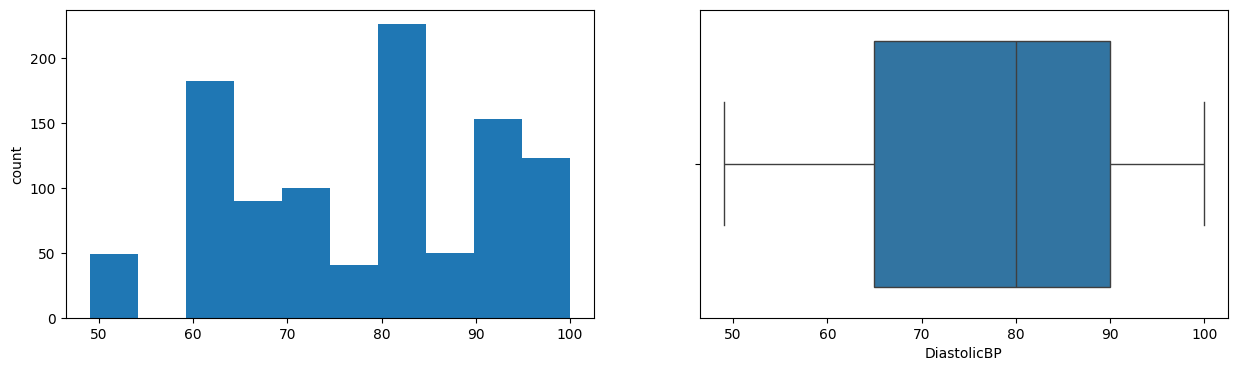

BS
Skew : 1.87


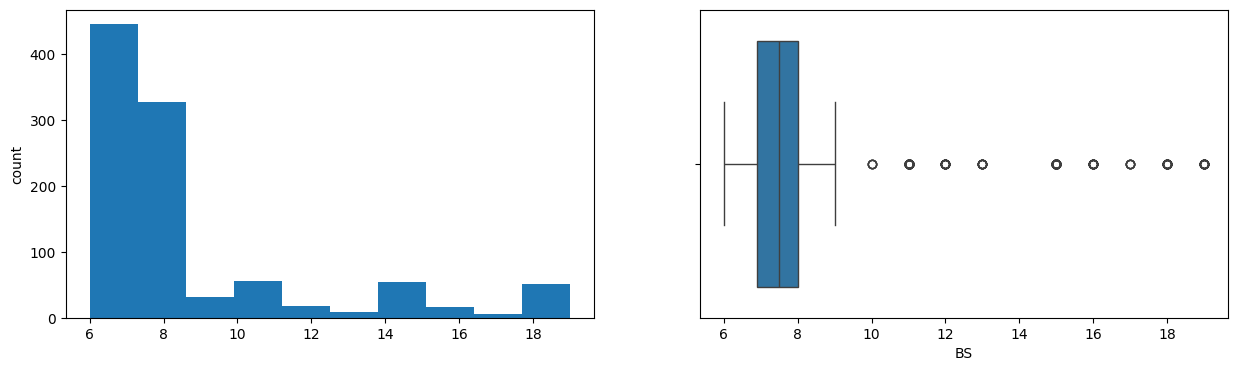

BodyTemp
Skew : 1.75


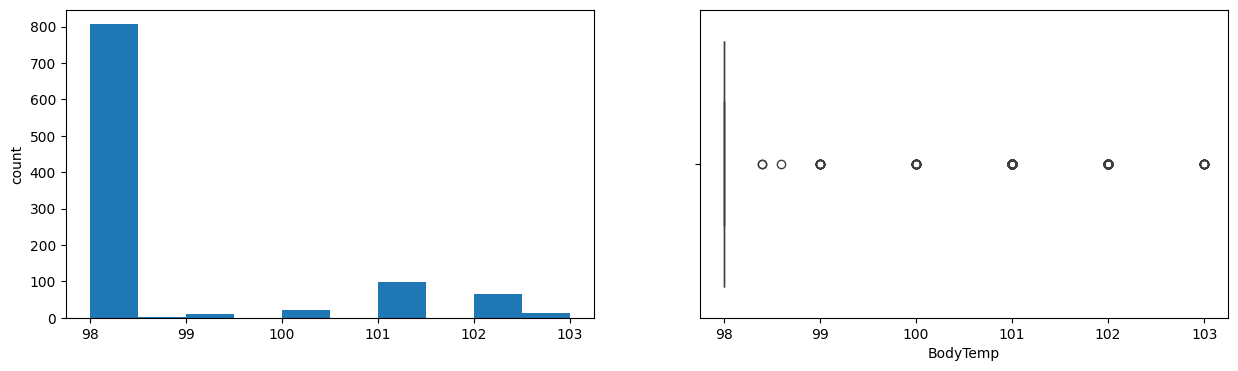

HeartRate
Skew : -1.04


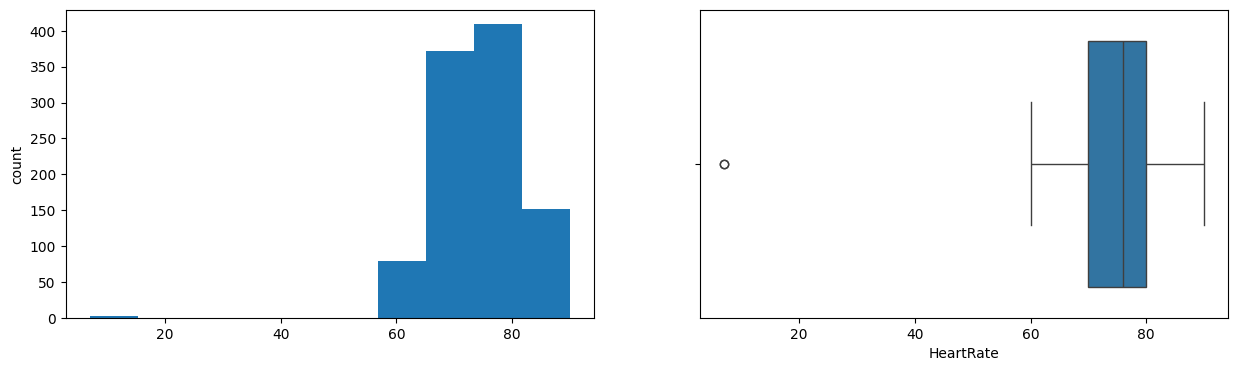

BS_log
Skew : 1.55


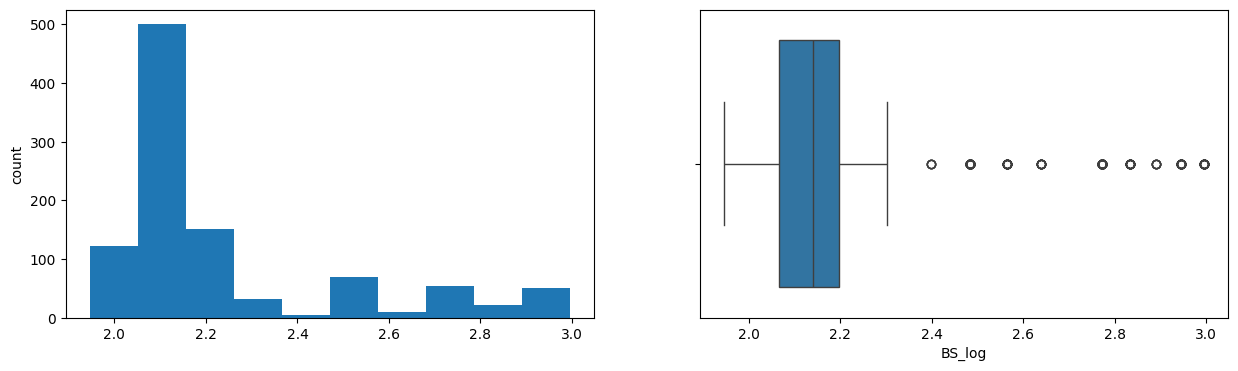

BodyTemp_log
Skew : 1.74


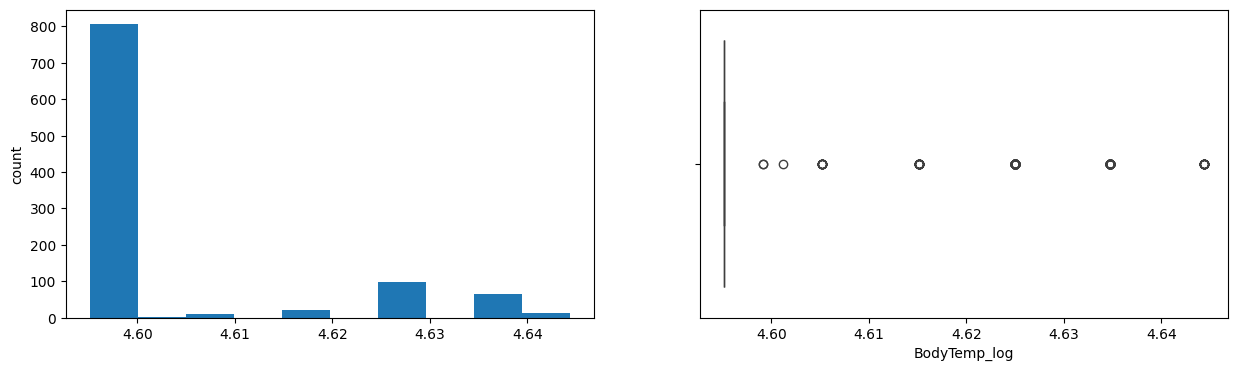

HeartRate_squared
Skew : 0.08


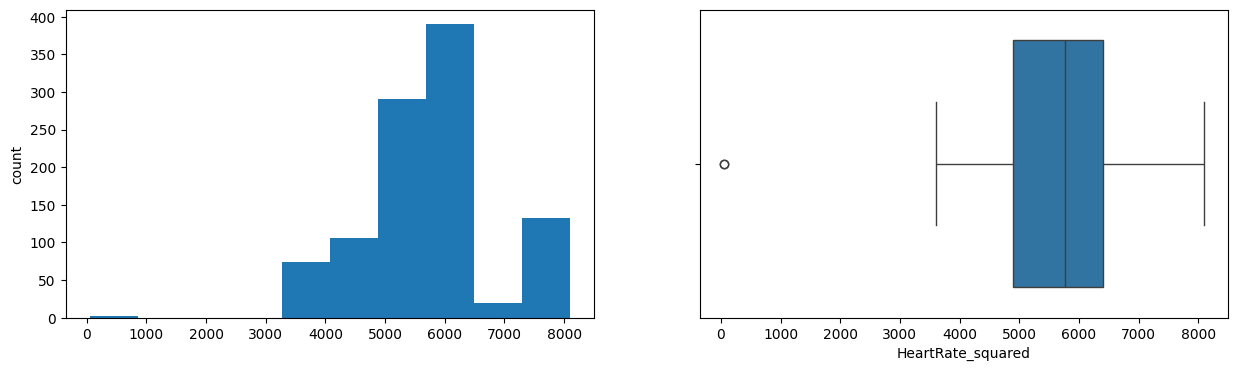

BS_boxcox
Skew : 0.38


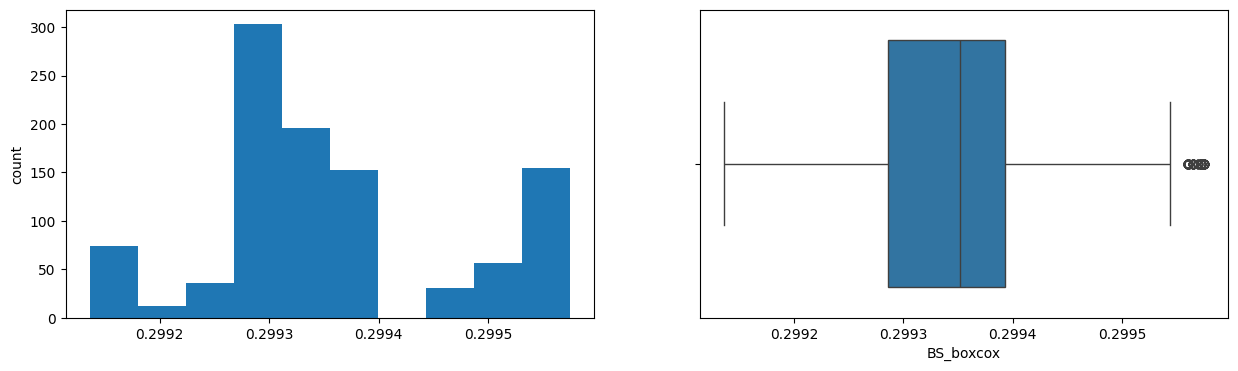

BS_yeojohnson
Skew : 0.38


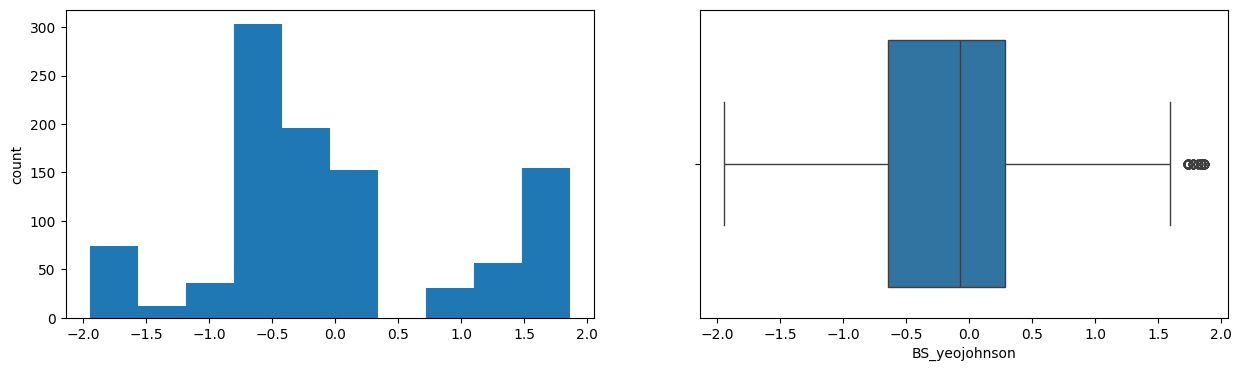

BodyTemp_yeojohnson
Skew : 0.0


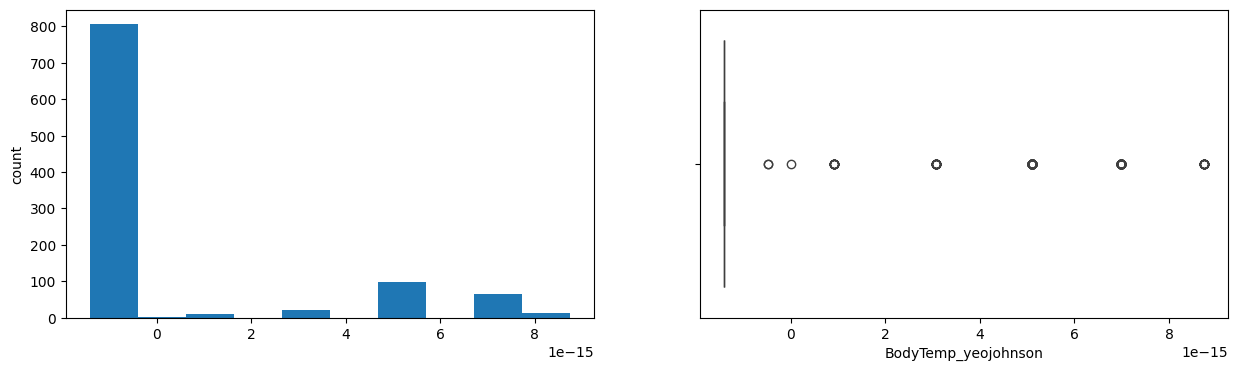

In [ ]:
for col in num_cols:
    print(col)
    print('Skew :', round(data[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    data[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.show()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1014 non-null   int64  
 1   SystolicBP           1014 non-null   int64  
 2   DiastolicBP          1014 non-null   int64  
 3   BS                   1014 non-null   float64
 4   BodyTemp             1014 non-null   float64
 5   HeartRate            1014 non-null   int64  
 6   RiskLevel            1014 non-null   object 
 7   BS_log               1014 non-null   float64
 8   BodyTemp_log         1014 non-null   float64
 9   HeartRate_squared    1014 non-null   int64  
 10  BS_boxcox            1014 non-null   float64
 11  BS_yeojohnson        1014 non-null   float64
 12  BodyTemp_yeojohnson  1014 non-null   float64
dtypes: float64(7), int64(5), object(1)
memory usage: 103.1+ KB


In [ ]:
from sklearn.preprocessing import PowerTransformer
import pandas as pd

# Load the new data
original_data = df.copy()

# Apply the same transformations as in training
power_transformer = PowerTransformer(method='yeo-johnson', standardize=True)

# Transform 'BS' and 'BodyTemp' (assuming you did this transformation in training)
original_data['BS_yeojohnson'] = power_transformer.fit_transform(original_data[['BS']])
original_data['BodyTemp_yeojohnson'] = power_transformer.fit_transform(original_data[['BodyTemp']])

# Add squared transformation for 'HeartRate'
original_data['HeartRate_squared'] = original_data['HeartRate'] ** 2

# Drop original columns that were transformed
data_cleaned = original_data.drop(columns=['BS', 'BodyTemp', 'HeartRate'])
import joblib
joblib.dump(power_transformer, 'power_transformer.pkl')


['power_transformer.pkl']

In [ ]:
data_cleaned.head()

,Age,SystolicBP,DiastolicBP,RiskLevel,BS_yeojohnson,BodyTemp_yeojohnson,HeartRate_squared
0,25,130,80,high risk,1.732679,-1.415534e-15,7396
1,35,140,90,high risk,1.592946,-1.415534e-15,4900
2,29,90,70,high risk,0.283503,3.080869e-15,6400
3,30,140,85,high risk,-0.534314,-1.415534e-15,4900
4,35,120,60,low risk,-1.765530,-1.415534e-15,5776


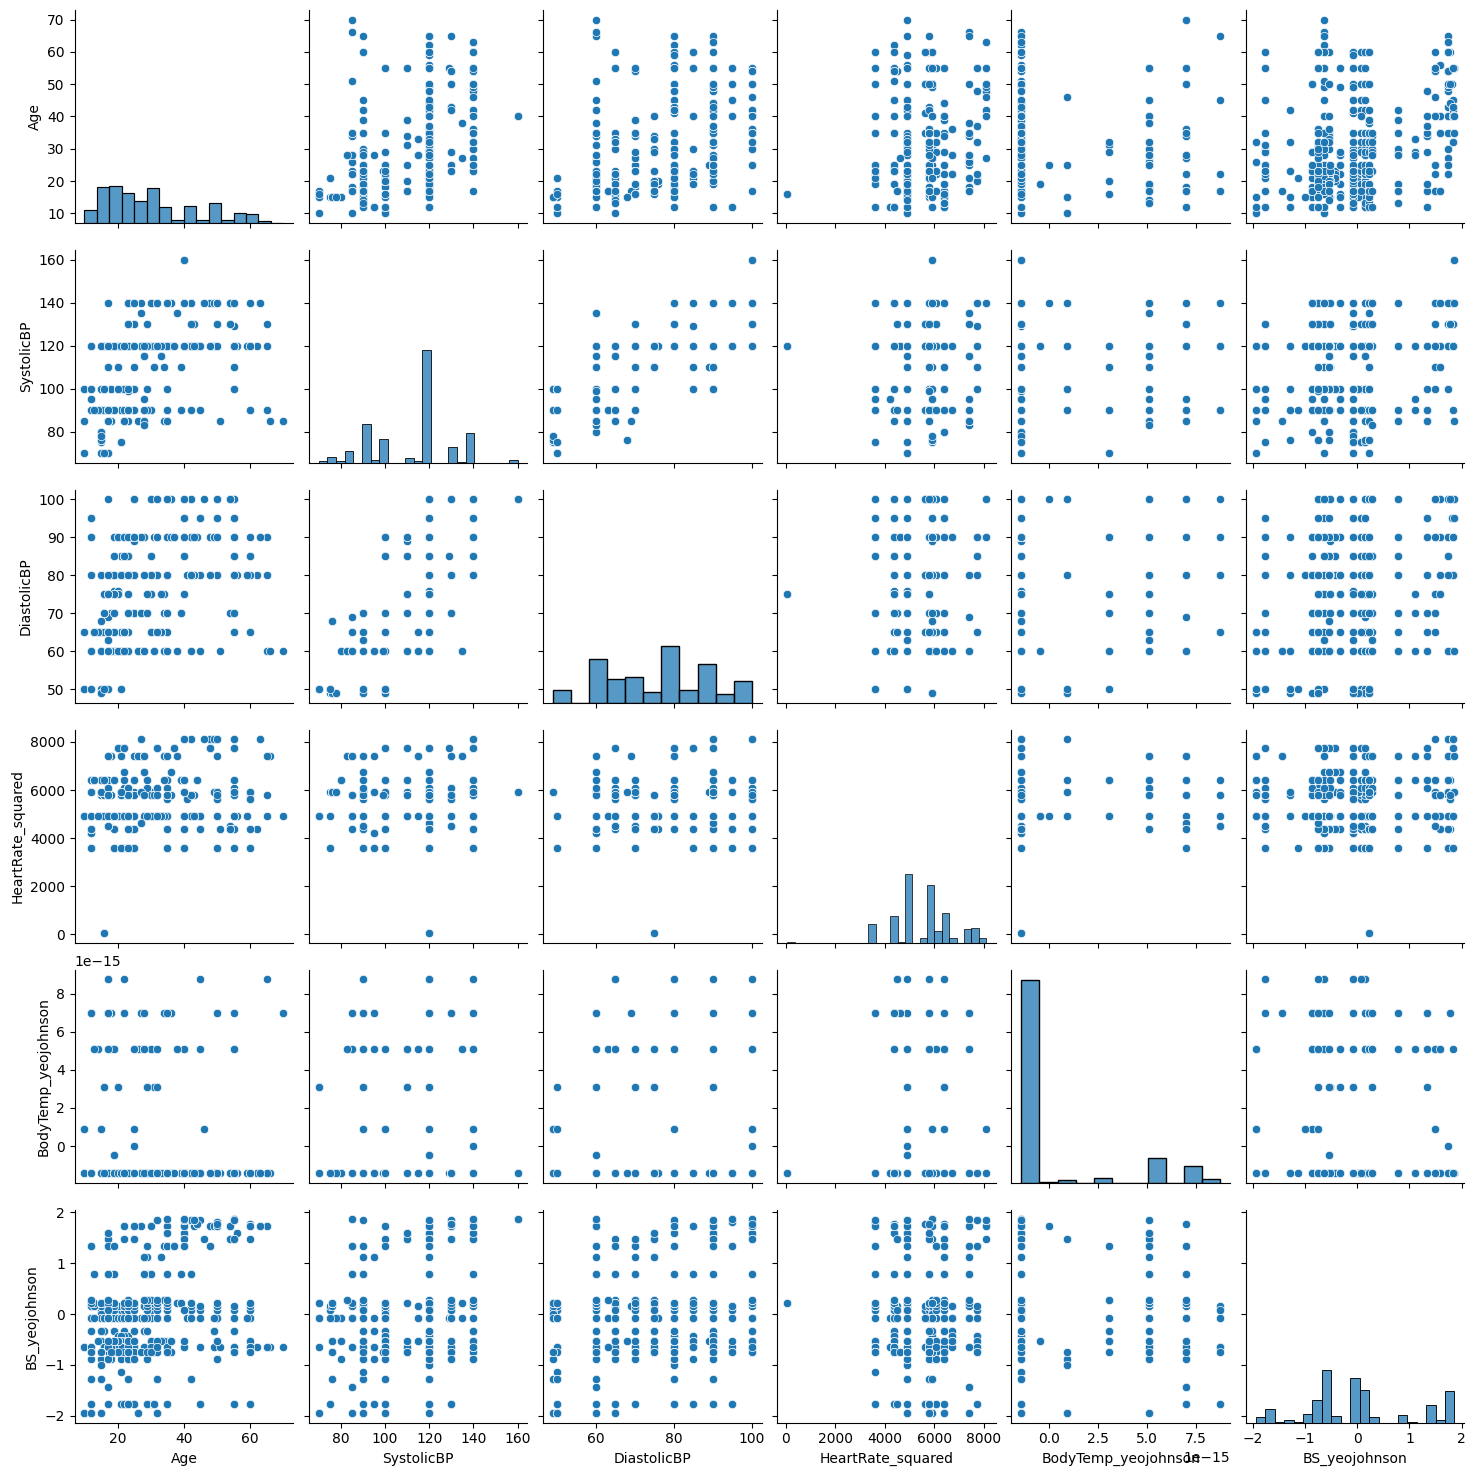

In [ ]:
sns.pairplot(data_cleaned[['Age',	'SystolicBP',	'DiastolicBP',	'HeartRate_squared',	'BodyTemp_yeojohnson',	'BS_yeojohnson']])
plt.show()

In [ ]:
cat_cols=data_cleaned.select_dtypes(include=['object']).columns
num_cols = data_cleaned.select_dtypes(include=['float64','int64'])
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['RiskLevel'], dtype='object')
Numerical Variables:
      Age  SystolicBP  DiastolicBP  BS_yeojohnson  BodyTemp_yeojohnson  \
0      25         130           80       1.732679        -1.415534e-15   
1      35         140           90       1.592946        -1.415534e-15   
2      29          90           70       0.283503         3.080869e-15   
3      30         140           85      -0.534314        -1.415534e-15   
4      35         120           60      -1.765530        -1.415534e-15   
...   ...         ...          ...            ...                  ...   
1009   22         120           60       1.732679        -1.415534e-15   
1010   55         120           90       1.841288        -1.415534e-15   
1011   35          85           60       1.863349        -1.415534e-15   
1012   43         120           90       1.841288        -1.415534e-15   
1013   32         120           65      -1.947207         5.107026e-15   

      HeartRate_squared  
0   

In [ ]:
# Correlation matrix
corr_matrix = num_cols.corr()
corr_matrix

,Age,SystolicBP,DiastolicBP,BS_yeojohnson,BodyTemp_yeojohnson,HeartRate_squared
Age,1.000000,0.416045,0.398026,0.408320,-0.256659,0.083096
SystolicBP,0.416045,1.000000,0.787006,0.315952,-0.287400,-0.020633
DiastolicBP,0.398026,0.787006,1.000000,0.396439,-0.259884,-0.041883
BS_yeojohnson,0.408320,0.315952,0.396439,1.000000,-0.027497,0.175072
BodyTemp_yeojohnson,-0.256659,-0.287400,-0.259884,-0.027497,1.000000,0.103286
HeartRate_squared,0.083096,-0.020633,-0.041883,0.175072,0.103286,1.000000


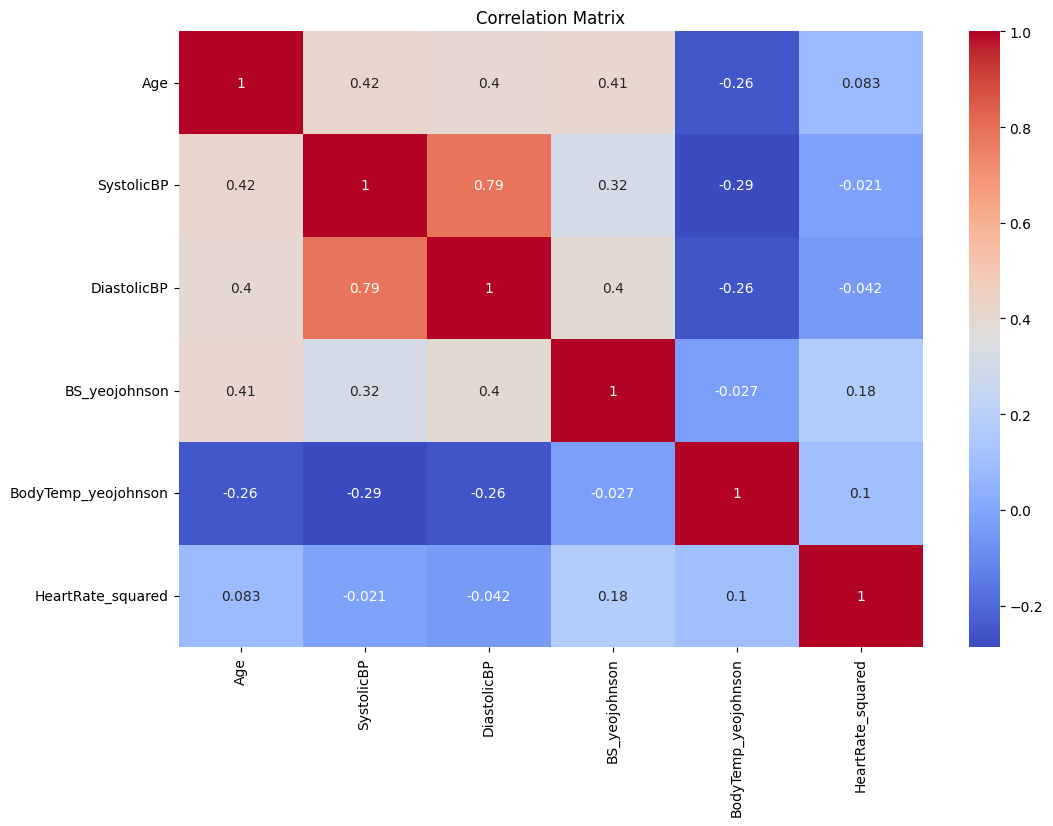

In [ ]:

# Heatmap for visualizing correlations
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Feature engineering

In [ ]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1014 non-null   int64  
 1   SystolicBP           1014 non-null   int64  
 2   DiastolicBP          1014 non-null   int64  
 3   RiskLevel            1014 non-null   object 
 4   BS_yeojohnson        1014 non-null   float64
 5   BodyTemp_yeojohnson  1014 non-null   float64
 6   HeartRate_squared    1014 non-null   int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [ ]:
data['RiskLevel'].value_counts()

,count
RiskLevel,
low risk,406
mid risk,336
high risk,272


In [ ]:

from imblearn.over_sampling import SMOTE

X = data_cleaned.drop('RiskLevel', axis=1)  # Features
y = data_cleaned['RiskLevel']  # Target

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

undersample = RandomUnderSampler(random_state=42)
X_res, y_res = undersample.fit_resample(X, y)

In [ ]:
cat_cols=data_cleaned.select_dtypes(include=['object']).columns
num_cols = data_cleaned.select_dtypes(include=['float64','int64'])

In [ ]:
from sklearn.preprocessing import LabelBinarizer

for col in cat_cols:
  lb = LabelBinarizer()
  data_cleaned[col] = lb.fit_transform(data_cleaned[col])

# Model Training

**Train-test Split**

---



In [ ]:
from sklearn.model_selection import train_test_split
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)


**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and training the Logistic Regression model
model = LogisticRegression(max_iter=1000)  # Increase max_iter if needed
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.5976

Classification Report:
              precision    recall  f1-score   support

   high risk       0.80      0.74      0.76        53
    low risk       0.61      0.48      0.54        62
    mid risk       0.44      0.59      0.50        49

    accuracy                           0.60       164
   macro avg       0.62      0.60      0.60       164
weighted avg       0.62      0.60      0.60       164


Confusion Matrix:
[[39  7  7]
 [ 2 30 30]
 [ 8 12 29]]


**Gradient Boosting Classifier**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Initializing the Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(random_state=42)

# Training the model
gb_clf.fit(X_train, y_train)

# Predictions on the test set
y_pred = gb_clf.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.8292682926829268
              precision    recall  f1-score   support

   high risk       0.98      0.91      0.94        53
    low risk       0.84      0.74      0.79        62
    mid risk       0.70      0.86      0.77        49

    accuracy                           0.83       164
   macro avg       0.84      0.83      0.83       164
weighted avg       0.84      0.83      0.83       164



**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)

# Train the model
rf_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.8475609756097561
              precision    recall  f1-score   support

   high risk       0.96      0.92      0.94        53
    low risk       0.88      0.74      0.81        62
    mid risk       0.72      0.90      0.80        49

    accuracy                           0.85       164
   macro avg       0.86      0.85      0.85       164
weighted avg       0.86      0.85      0.85       164



**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree Classifier
dt_clf = DecisionTreeClassifier(random_state=42)

# Train the model
dt_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.823170731707317
              precision    recall  f1-score   support

   high risk       0.91      0.96      0.94        53
    low risk       0.85      0.66      0.75        62
    mid risk       0.72      0.88      0.79        49

    accuracy                           0.82       164
   macro avg       0.83      0.83      0.82       164
weighted avg       0.83      0.82      0.82       164



In [ ]:
from sklearn.naive_bayes import GaussianNB

# Initialize the Naive Bayes Classifier
nb_clf = GaussianNB()

# Train the model
nb_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.5975609756097561
              precision    recall  f1-score   support

   high risk       0.84      0.70      0.76        53
    low risk       0.57      0.48      0.52        62
    mid risk       0.46      0.63      0.53        49

    accuracy                           0.60       164
   macro avg       0.62      0.60      0.61       164
weighted avg       0.62      0.60      0.60       164



In [ ]:
data.columns.tolist()

['Age',
 'SystolicBP',
 'DiastolicBP',
 'BS',
 'BodyTemp',
 'HeartRate',
 'RiskLevel',
 'BS_log',
 'BodyTemp_log',
 'HeartRate_squared',
 'BS_boxcox',
 'BS_yeojohnson',
 'BodyTemp_yeojohnson']

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


# Create GridSearchCV object
grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_rf_clf = grid_search.best_estimator_

print("Best Parameters:", best_params)

# Evaluate the best model on the test set
y_pred = best_rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with best parameters:", accuracy)
print(classification_report(y_test, y_pred))

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy with best parameters: 0.8414634146341463
              precision    recall  f1-score   support

   high risk       0.96      0.94      0.95        53
    low risk       0.84      0.74      0.79        62
    mid risk       0.74      0.86      0.79        49

    accuracy                           0.84       164
   macro avg       0.84      0.85      0.84       164
weighted avg       0.85      0.84      0.84       164



In [ ]:
import pickle

filename = 'maternity_risk_prediction.pkl'

pickle.dump(grid_search, open(filename, 'wb'))

#Load and test saved model
loaded_model = pickle.load(open(filename, 'rb'))

In [ ]:
import pandas as pd
import joblib
from sklearn.metrics import classification_report, accuracy_score

# Load the trained model and the fitted transformer
model = joblib.load('maternity_risk_prediction.pkl')  # Replace 'trained_model.pkl' with your model's filename
power_transformer = joblib.load('power_transformer.pkl')

# Load and preprocess the test data
# Replace this with your actual test data

test_data = pd.DataFrame({
    'Age': [20],
    'SystolicBP': [90],
    'DiastolicBP': [60],
    'BS': [4.5],
    'BodyTemp': [98.4],
    'HeartRate': [72],
    'RiskLevel': ['low risk']  # Optional if needed for evaluation
})

# Apply transformations to the test data
test_data['BS_yeojohnson'] = power_transformer.transform(test_data[['BS']])
test_data['BodyTemp_yeojohnson'] = power_transformer.transform(test_data[['BodyTemp']])
test_data['HeartRate_squared'] = test_data['HeartRate'] ** 2

# Keep only the columns that were used during training
X_test = test_data[['Age', 'SystolicBP', 'DiastolicBP', 'HeartRate_squared', 'BS_yeojohnson', 'BodyTemp_yeojohnson']]
y_test = test_data['RiskLevel']  # If you have labels for evaluation

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- BS
Feature names seen at fit time, yet now missing:
- BodyTemp
